1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

Prediction: PNEUMONIA (score = 0.9996)


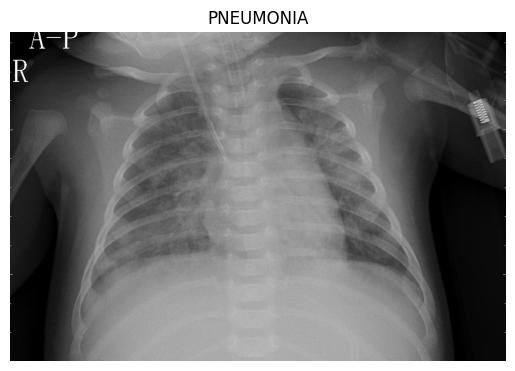

In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------- 1) Load Saved Model ----------
model = tf.keras.models.load_model("Trained_Model.keras")


# ---------- 2) Prediction Function ----------
def predict_image(model, img_path):

    # load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # resize
    img_resized = cv2.resize(img, (150,150))

    # normalize
    img_normalized = img_resized / 255.0

    # batch dimension
    img_input = np.expand_dims(img_normalized, axis=0)

    # predict
    pred = model.predict(img_input)[0][0]

    # label
    label = "PNEUMONIA" if pred > 0.5 else "NORMAL"

    print(f"\nPrediction: {label} (score = {pred:.4f})")

    # show image
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    plt.show()


# ---------- 3) Call Function ----------
# change the path to your image
predict_image(model, r'chest_xray\val\PNEUMONIA\person1946_bacteria_4875.jpeg')
